In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import json
import numpy as np
import requests
import os
import re
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Activation, RandomFlip, RandomRotation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import pickle

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
to_save = {'X_order_6_train': '', 'X_order_6_test': '', 'X_order_6_valid': '', 'y_order_6_train': '', 'y_order_6_test': '', 'y_order_6_valid': ''}

In [5]:
path = '/content/drive/MyDrive/mushroom_data/'

In [6]:
for item in to_save:
    print(item)
    with open(f'{path}{item}.pickle', 'rb') as f:
        to_save[item] = pickle.load(f)

X_order_6_train
X_order_6_test
X_order_6_valid
y_order_6_train
y_order_6_test
y_order_6_valid


In [7]:
X_train = to_save['X_order_6_train']
X_test = to_save['X_order_6_test']
X_valid = to_save['X_order_6_valid']
y_train = to_save['y_order_6_train']
y_test = to_save['y_order_6_test']
y_valid = to_save['y_order_6_valid']

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape)

(649, 112, 112, 3) (649, 9) (81, 112, 112, 3) (81,) (86, 112, 112, 3) (86, 9)


In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
num_classes = 9
input_shape = (112,112,3)

model = keras.Sequential()

model.add(Conv2D(112, (3,3), input_shape=input_shape))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(56, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(28, (3,3)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(112, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

In [11]:
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [12]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 112)     3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 110, 110, 112)     0         
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 112)    448       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 112)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 55, 55, 112)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 56)        5

In [14]:
epochs=200
history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train) // 32,
        epochs=epochs,
        validation_data=(X_valid, y_valid))

Epoch 1/200
20/20 [==============================] - 19s 186ms/step - loss: 2.4784 - accuracy: 0.2674 - val_loss: 2.3048 - val_accuracy: 0.0698
Epoch 2/200
20/20 [==============================] - 2s 113ms/step - loss: 1.7169 - accuracy: 0.4165 - val_loss: 2.4798 - val_accuracy: 0.0930
Epoch 3/200
20/20 [==============================] - 2s 114ms/step - loss: 1.6343 - accuracy: 0.4376 - val_loss: 2.7804 - val_accuracy: 0.0698
Epoch 4/200
20/20 [==============================] - 2s 114ms/step - loss: 1.4823 - accuracy: 0.4668 - val_loss: 2.8319 - val_accuracy: 0.1047
Epoch 5/200
20/20 [==============================] - 3s 136ms/step - loss: 1.3408 - accuracy: 0.5024 - val_loss: 3.0301 - val_accuracy: 0.0698
Epoch 6/200
20/20 [==============================] - 2s 112ms/step - loss: 1.4442 - accuracy: 0.4619 - val_loss: 3.1553 - val_accuracy: 0.0698
Epoch 7/200
20/20 [==============================] - 2s 112ms/step - loss: 1.3722 - accuracy: 0.4765 - val_loss: 3.1986 - val_accuracy: 0.139

In [15]:
model.save('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6')

In [16]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_history.pickle', 'wb') as f:
    pickle.dump(history.history['loss'], f)

In [17]:
import pickle
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_history.pickle', 'rb') as f:
    loss = pickle.load(f)

In [18]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_valid_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_loss'], f)

In [19]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_valid_history.pickle', 'rb') as f:
    val_loss = pickle.load(f)

In [20]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['accuracy'], f)

In [21]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_accuracy_history.pickle', 'rb') as f:
    accuracy = pickle.load(f)

In [22]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_val_accuracy_history.pickle', 'wb') as f:
    pickle.dump(history.history['val_accuracy'], f)

In [23]:
with open('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6_val_accuracy_history.pickle', 'rb') as f:
    val_accuracy = pickle.load(f)

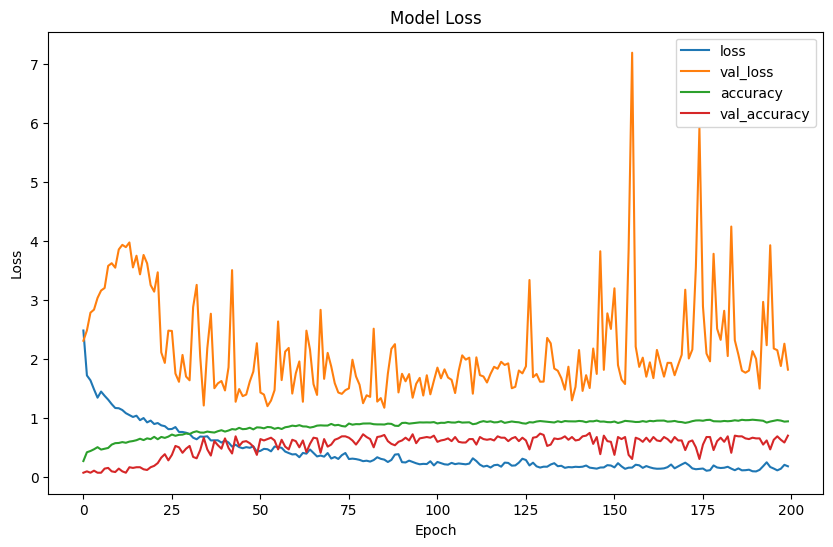

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

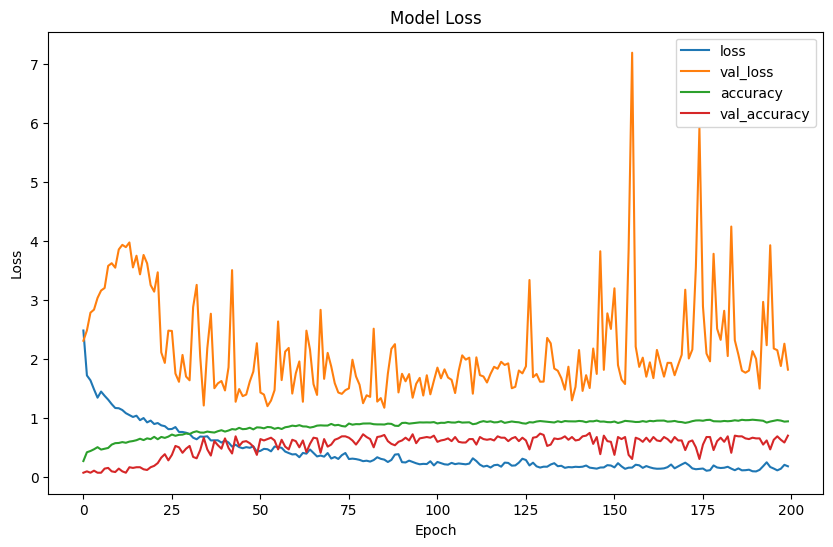

In [25]:
plt.figure(figsize=(10,6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.legend()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [26]:
model = keras.models.load_model('/content/drive/MyDrive/Mushroom Project/mushroom_model_order_6')

In [27]:
y_test_categorical = to_categorical(y_test)

In [28]:
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.108153820037842
Test accuracy: 0.604938268661499


In [29]:
predictions = model.predict(X_test, verbose=0)
preds = [np.argmax(p) for p in predictions]

In [30]:
accuracy_score(preds, y_test)

0.6049382716049383

In [31]:
print(classification_report(y_test, preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.67      0.33      0.44         6
           2       0.67      0.33      0.44         6
           3       0.47      0.62      0.53        13
           4       0.14      0.33      0.20         3
           5       0.40      0.40      0.40         5
           6       0.89      0.62      0.73        13
           7       0.78      0.54      0.64        13
           8       0.50      0.70      0.58        10

    accuracy                           0.60        81
   macro avg       0.60      0.54      0.54        81
weighted avg       0.66      0.60      0.61        81

